In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import graphviz
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

In [2]:
date=pd.read_csv('D:/Python/Github_ML/Machine-Learning/data/_preprocessed.csv', index_col=0)

## Наша задача предсказать какой тип товара выберет клиент( акции, облигации или etf) из его признаков. 

### Посмотррим наибольшую корреляцию 'product-type' с другими признаками.

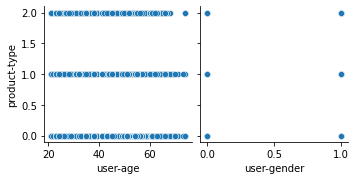

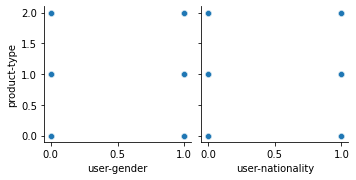

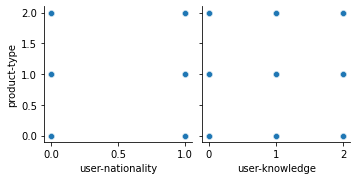

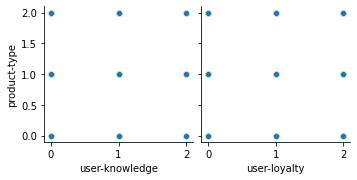

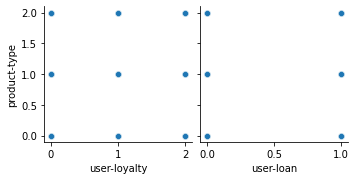

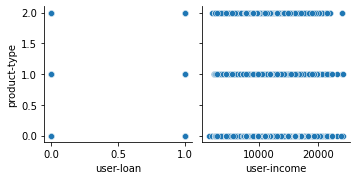

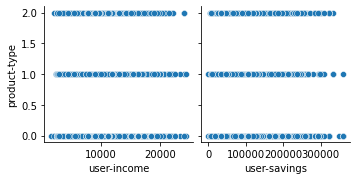

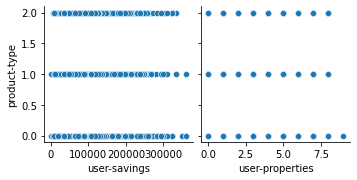

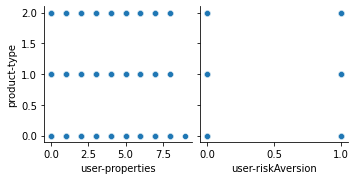

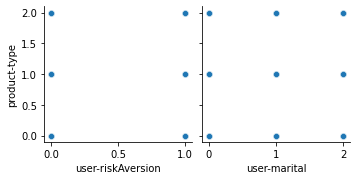

In [3]:
for i in range(1,11):
    sns.pairplot(date,x_vars=[f'{date.columns[i]}',f'{date.columns[i+1]}'], y_vars=['product-type']);

In [4]:
date.drop(columns=['product-type']).corrwith(date['product-type'])

user-id             -0.004540
user-age            -0.091749
user-gender         -0.001305
user-nationality     0.005397
user-knowledge      -0.016909
user-loyalty        -0.000782
user-loan            0.026493
user-income         -0.091718
user-savings        -0.054584
user-properties     -0.036142
user-riskAversion   -0.108698
user-marital         0.009924
user-dependents      0.050144
user-pension        -0.061167
product-risk        -0.050247
product-term         0.019135
product-yield       -0.050247
transaction-id      -0.004464
year                -0.000981
month               -0.005700
score                0.016353
dtype: float64

### Выберем признаки, по которым будем  будем проводить обучение

In [5]:
df=date[['user-age', 'user-knowledge',  'user-income', 'user-savings', 'user-properties', 'user-riskAversion',
'user-marital', 'user-dependents', 'user-pension', 'product-yield', 'product-term', 'product-type']]
df.head()

,user-age,user-knowledge,user-income,user-savings,user-properties,user-riskAversion,user-marital,user-dependents,user-pension,product-yield,product-term,product-type
0,41,0,10822,132392,0,1,0,0,483040,1,30,1
1,41,0,10822,132392,0,1,0,0,483040,2,10,2
2,41,0,10822,132392,0,1,0,0,483040,2,10,0
3,41,0,10822,132392,0,1,0,0,483040,0,20,0
4,25,0,5284,51806,0,0,1,5,113300,0,1,0


In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42) # Разбиение на трен. и тестовую выбирки

## KNN

In [220]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [221]:
y_pred = clf.predict(X_test)

In [222]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[976 183  78]
 [455  87  41]
 [368  59  30]]
              precision    recall  f1-score   support

           0       0.54      0.79      0.64      1237
           1       0.26      0.15      0.19       583
           2       0.20      0.07      0.10       457

    accuracy                           0.48      2277
   macro avg       0.34      0.33      0.31      2277
weighted avg       0.40      0.48      0.42      2277



#### Подбор гиперпараметров

In [213]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors':[1, 2, 3, 4, 5]}

knn = KNeighborsClassifier()

clssfr = GridSearchCV(knn, parameters)

clssfr.fit(X_train, y_train)

clssfr.best_params_

{'n_neighbors': 2}

#### Проверка собственного алгоритма KNN

In [226]:
from collections import Counter

In [ ]:
clf = KNN(3)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
clf.score(X_test, y_test)

In [8]:
%run KNN_NB_DTC.ipynb

In [9]:
knn=KNN(2)
knn.train(X_train, y_train)

In [10]:
dists=knn.compute_distance(X_test)
y_pred=knn.predict_labels(dists,2)
accuracy=np.mean(y_test.ravel()==y_pred)
print(f'accuracy: {accuracy}')

accuracy: 0.4194115063680281


## DTC  Дерево решений

In [231]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [232]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[718 284 235]
 [316 153 114]
 [234 114 109]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1237
           1       0.28      0.26      0.27       583
           2       0.24      0.24      0.24       457

    accuracy                           0.43      2277
   macro avg       0.36      0.36      0.36      2277
weighted avg       0.43      0.43      0.43      2277



#### ___

## NB Наивный байесовский классификатор (Naive Bayes)

In [244]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [247]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred));
print(classification_report(y_test, y_pred));

[[1237    0    0]
 [ 583    0    0]
 [ 457    0    0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1237
           1       0.00      0.00      0.00       583
           2       0.00      0.00      0.00       457

    accuracy                           0.54      2277
   macro avg       0.18      0.33      0.23      2277
weighted avg       0.30      0.54      0.38      2277



D:\Annexes\forConda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Annexes\forConda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Annexes\forConda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM Метод опорных векторов (Support Vector Machines)

In [248]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [249]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1237    0    0]
 [ 583    0    0]
 [ 457    0    0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1237
           1       0.00      0.00      0.00       583
           2       0.00      0.00      0.00       457

    accuracy                           0.54      2277
   macro avg       0.18      0.33      0.23      2277
weighted avg       0.30      0.54      0.38      2277



D:\Annexes\forConda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Annexes\forConda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Annexes\forConda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Логистическая регрессия

In [250]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [251]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1237    0    0]
 [ 583    0    0]
 [ 457    0    0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1237
           1       0.00      0.00      0.00       583
           2       0.00      0.00      0.00       457

    accuracy                           0.54      2277
   macro avg       0.18      0.33      0.23      2277
weighted avg       0.30      0.54      0.38      2277



D:\Annexes\forConda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Annexes\forConda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Annexes\forConda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
